Edwin Sanchez

# Data Discovery

This notebook attempts to look through the dataset to find interesting features.

> I "borrowed" a lot of code from the PyTorch Metric Learning's [Examples on Google Colab](https://github.com/KevinMusgrave/pytorch-metric-learning/blob/master/examples/README.md), specifically the [MNIST using SubCenterArcFaceLoss](https://github.com/KevinMusgrave/pytorch-metric-learning/blob/master/examples/notebooks/SubCenterArcFaceMNIST.ipynb) Notebook.

In [1]:
# Imports
import os
from tqdm import tqdm
import pandas as pd

## Define Useful Functions / Import Custom Functions

In [2]:
# Useful Functions / Custom Imports
from load_dataset import load_dataset_pd

## Read in Dataset

In [4]:
# Read in Dataset

# the directory containing the CIC-IDS2017 dataset
DATASET_DIR : str = "./CIC-IDS2017/"

# load the dataset
file_paths, dfs = load_dataset_pd ( dataset_dir = DATASET_DIR )

# print contents
for file_path, df in zip ( file_paths, dfs ):
    print ( f"File Path: { file_path }" )
    print ( df.head ( n = 2 ) )

Loading CSV file data from the directory './CIC-IDS2017/'.


100%|██████████| 8/8 [00:18<00:00,  2.29s/it]

File Path: ./CIC-IDS2017/Monday-WorkingHours.pcap_ISCX.csv
    Destination Port   Flow Duration   Total Fwd Packets  \
0              49188               4                   2   
1              49188               1                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                      6.0                     0.0   
1                       6                      6.0                     0.0   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                   

In [5]:
# list the columns in the csv file
# print ( dfs[0].columns )

for column in dfs[0].columns:
    print ( f"Number of Unique Elements: { df[column].nunique() } | Column: { column }" )

Number of Unique Elements: 14495 | Column:  Destination Port
Number of Unique Elements: 64077 | Column:  Flow Duration
Number of Unique Elements: 384 | Column:  Total Fwd Packets
Number of Unique Elements: 486 | Column:  Total Backward Packets
Number of Unique Elements: 5326 | Column: Total Length of Fwd Packets
Number of Unique Elements: 11163 | Column:  Total Length of Bwd Packets
Number of Unique Elements: 2569 | Column:  Fwd Packet Length Max
Number of Unique Elements: 123 | Column:  Fwd Packet Length Min
Number of Unique Elements: 12922 | Column:  Fwd Packet Length Mean
Number of Unique Elements: 18232 | Column:  Fwd Packet Length Std
Number of Unique Elements: 2718 | Column: Bwd Packet Length Max
Number of Unique Elements: 352 | Column:  Bwd Packet Length Min
Number of Unique Elements: 15876 | Column:  Bwd Packet Length Mean
Number of Unique Elements: 18464 | Column:  Bwd Packet Length Std
Number of Unique Elements: 87365 | Column: Flow Bytes/s
Number of Unique Elements: 68847 | 

In [6]:
# get destination ports, find the most heavily-trafficked ports

# Set N for the top N ports
num_top_ports : int = 5

# Find the top N destination ports with the most traffic
# the column names have
top_ports : pd.Series = df[' Destination Port'].value_counts().head ( num_top_ports )

print ( top_ports )

 Destination Port
53      58744
443     26935
80      16741
22        915
8080      778
Name: count, dtype: int64


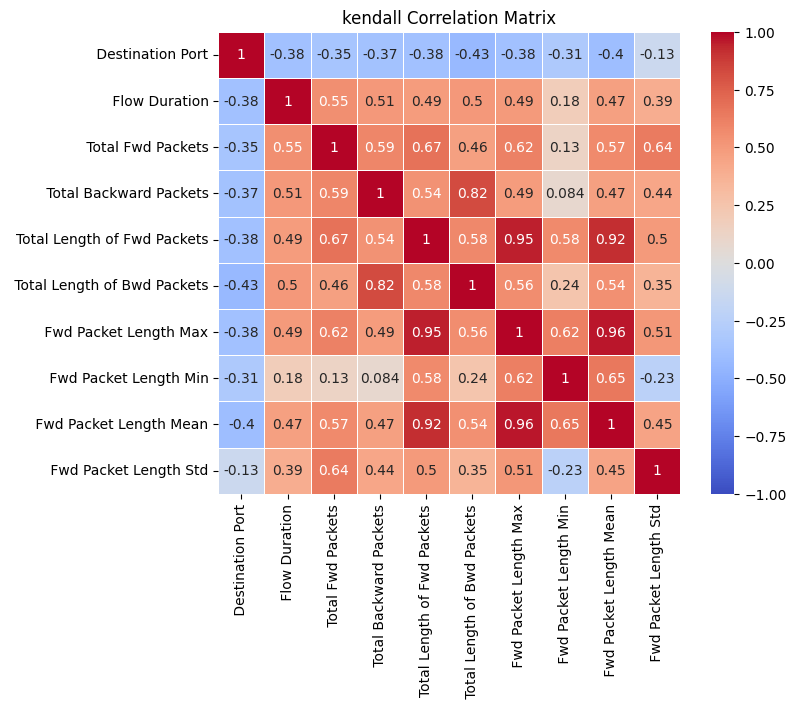

In [8]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# drop a bunch of columns so we can see what's going on (too many)
N : int = 10
df_10_columns = df.iloc[:, :N]

# Calculate the correlation matrix
options : str = [ 'pearson', 'kendall', 'spearman']
method : str = options[1]
correlation_matrix = df_10_columns.corr(method=method)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)

# Add title
plt.title(f'{method} Correlation Matrix')

# Show the plot
plt.show()